### Libraries

In [1]:
import torch
import torch.nn as nn
from torchsummary import summary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler

### Data Preprocessing

In [2]:
dataframe = pd.read_csv('Housing-1.csv')

# print the first 5 rows of the dataframe
print(dataframe.head())



      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [3]:
# Check if there are any NaN values in the DataFrame
if dataframe.isna().any().any():
    print("There are NaN values in the DataFrame.")
else:
    print("There are no NaN values in the DataFrame.")

There are no NaN values in the DataFrame.


In [4]:
# Check if there are any missing values in the DataFrame
if dataframe.isnull().any().any():
    print("There are missing values in the DataFrame.")

(545,)
(545,)


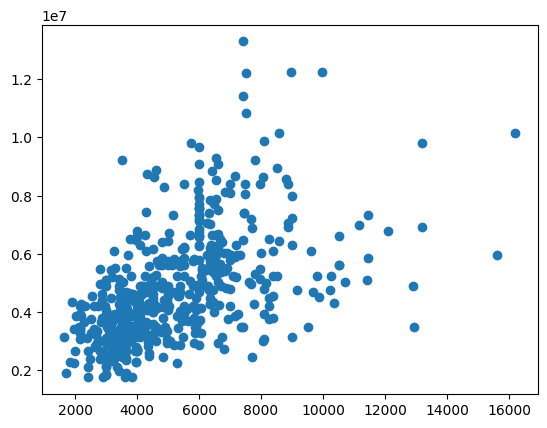

In [5]:
plt.scatter(dataframe['area'], dataframe['price'])
dataframe['area'] = (dataframe['area'] - dataframe['area'].mean()) / dataframe['area'].std()


features = dataframe['area']
target = dataframe['price']

#Normalize the features

#plt.plot(features, target)
print(features.shape)
print(target.shape)

(array([ 73., 199., 116.,  88.,  39.,  15.,   8.,   5.,   0.,   2.]),
 array([-1.61304784, -0.9425845 , -0.27212116,  0.39834218,  1.06880553,
         1.73926887,  2.40973221,  3.08019555,  3.75065889,  4.42112223,
         5.09158557]),
 <BarContainer object of 10 artists>)

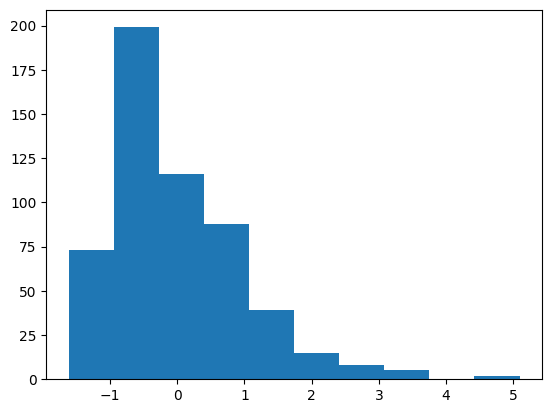

In [6]:


# Normalize the column 'area'
#dataframe['area'] = (dataframe['area'] - dataframe['area'].mean()) / dataframe['area'].std()
# Get the unique values of the column 'area'
plt.hist(features)

In [7]:
X_train, X_test_val, y_train, y_test_val = train_test_split(features, target, test_size=0.25)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5)



### Model Building

In [8]:
class myModel:
    def __init__(self):
        self.model = nn.Sequential(
            nn.Linear(1, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Linear(8,1)
        )

    def forward(self, x):
        return self.model(x)
    
    def summary(self):
        summary(self.model, (1,))

    def train(self, X_train, y_train, epochs=100, lr=0.01, batch_size=64):
        # Maximum absolute error
        criterion = nn.L1Loss()
        optimizer = torch.optim.Adam(self.model.parameters(), lr=lr)
        num_batches = len(X_train) // batch_size
        for epoch in range(epochs):
            self.model.train()
            optimizer.zero_grad()
            
            for batch in range(num_batches):
                start = batch * batch_size
                end = start + batch_size
                
                output = self.model(X_train[start:end])
                loss = criterion(output, y_train[start:end])
                loss.backward()
                optimizer.step()
            if epoch % 100 == 0:
                print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')

    def predict(self, X):
        self.model.eval()
        with torch.no_grad():
            return self.model(X)

### Model Training


In [9]:
model = myModel()


X_train_tensor = torch.tensor(X_train, dtype=torch.float32).view(-1, 1)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)

# Print the shape of the tensors
print(X_train_tensor.shape)
print(y_train_tensor.shape)

model.train(X_train_tensor, y_train_tensor, epochs=1000, lr=0.01, batch_size=32)
 


torch.Size([408, 1])
torch.Size([408, 1])


/home/maram/.local/lib/python3.9/site-packages/torch/autograd/__init__.py:266: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Epoch 1/1000, Loss: 5058701.0
Epoch 101/1000, Loss: 1519502.25
Epoch 201/1000, Loss: 1520919.625
Epoch 301/1000, Loss: 1521328.0
Epoch 401/1000, Loss: 1512894.375
Epoch 501/1000, Loss: 1529876.875
Epoch 601/1000, Loss: 1516250.75
Epoch 701/1000, Loss: 1510754.125
Epoch 801/1000, Loss: 1518670.5
Epoch 901/1000, Loss: 1510824.625


### Model Testing

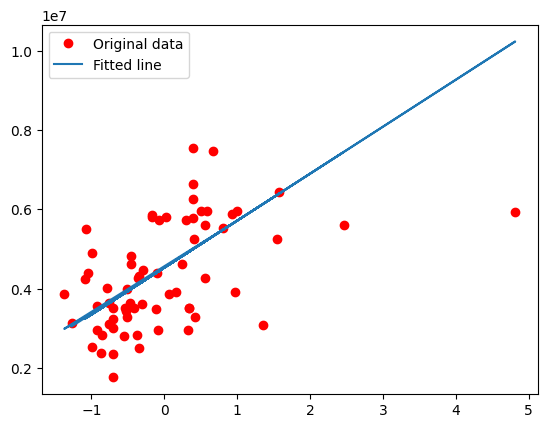

In [10]:

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

y_predict = model.predict(X_test_tensor)

plt.plot(X_test, y_test, 'ro', label='Original data')
plt.plot(X_test, y_predict, label='Fitted line')
plt.legend()